<a href="https://colab.research.google.com/github/1111parul/PRASUNET-Company-Tasks/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Can we predict a country's total population or dependency ratio based on its age group distribution?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
url = "/content/drive/MyDrive/World Population/population_by_age_group.csv"
data = pd.read_csv(url)


In [3]:
# Check for nulls
print(data.isnull().sum())

# Drop rows with missing values (optional: or use imputation)
data = data.dropna()

# Convert string numbers with commas to float (if needed)
for col in ['0-4 years', '5-14 years', '15-24 years', '25-64 years', '65+', 'Total']:
    data[col] = data[col].astype(str).str.replace(',', '').astype(float)


Country        0
Total          0
65+            0
25-64 years    0
15-24 years    0
5-14 years     0
0-4 years      0
dtype: int64


In [4]:
X = data[['0-4 years', '5-14 years', '15-24 years', '25-64 years', '65+']]
y = data['Total']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [7]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [9]:
import numpy as np

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Linear Regression R2 Score: 0.9999999999999997
Random Forest R2 Score: 0.8542835360920744
Linear Regression RMSE: 3.8848685212640546
Random Forest RMSE: 79157524.53552805


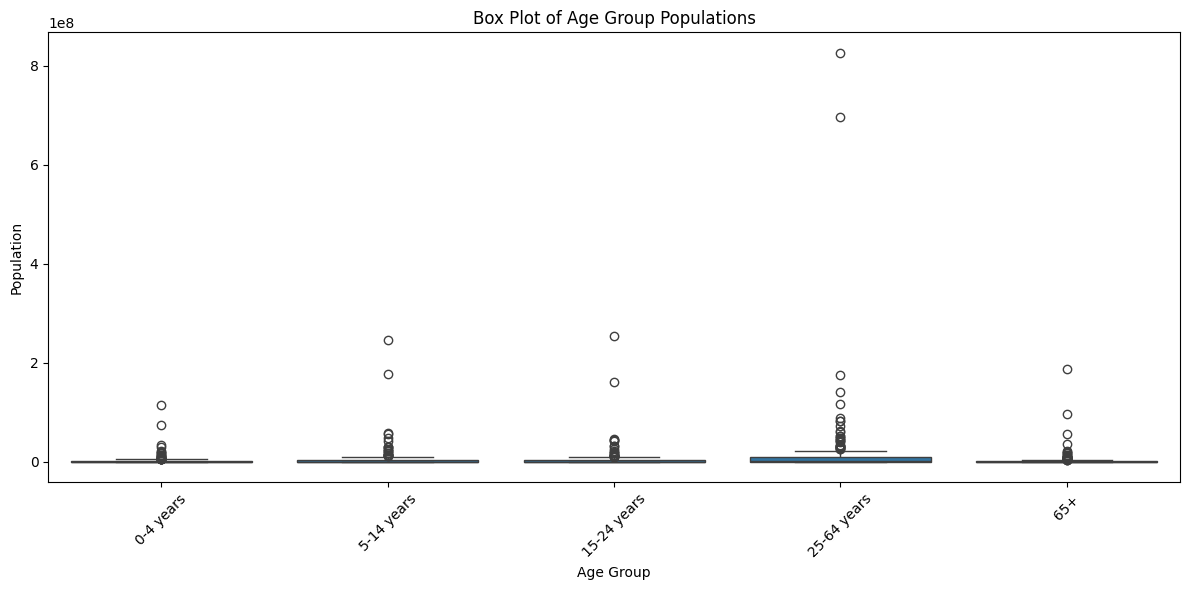

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

age_columns = ['0-4 years', '5-14 years', '15-24 years', '25-64 years', '65+']

plt.figure(figsize=(12, 6))
data_melted = data.melt(id_vars='Country', value_vars=age_columns, var_name='Age Group', value_name='Population')
sns.boxplot(x='Age Group', y='Population', data=data_melted)
plt.title('Box Plot of Age Group Populations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
